<a href="https://colab.research.google.com/github/parkyw2/parkyw2/blob/main/%EC%9E%84%EA%B8%88_%EB%B3%80%EB%8F%99_%EA%B3%B5%EC%9E%A5%EB%B3%84_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/My\ Drive/회사 데이터

/content/drive/My Drive/회사 데이터


In [4]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('labor').sheet1
rows = worksheet.get_all_values()

labor_df = pd.DataFrame.from_records(rows)

In [5]:
labor_df = labor_df.rename(columns=labor_df.iloc[0])
labor_df = labor_df.drop(labor_df.index[0])

In [6]:
labor_df.head(3)

,date,factory,time,money
1,2019-01-01,1,1652670,667616320
2,2019-01-01,2,712980,296922280
3,2019-01-01,4,511020,197626310


In [7]:
labor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 1 to 385
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     385 non-null    object
 1   factory  385 non-null    object
 2   time     385 non-null    object
 3   money    385 non-null    object
dtypes: object(4)
memory usage: 12.2+ KB


In [8]:
# 문자열을 정수형 타입으로 변경 (factory는 str로)
labor_df['factory'] = labor_df['factory'].astype(str)
labor_df['time'] = labor_df['time'].astype(int)
labor_df['money'] = labor_df['money'].astype(int)

# 문자열을 datetime 타입으로 변경.
labor_df['date'] = labor_df.date.apply(pd.to_datetime)
labor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 1 to 385
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     385 non-null    datetime64[ns]
 1   factory  385 non-null    object        
 2   time     385 non-null    int64         
 3   money    385 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 12.2+ KB


In [9]:
labor_df['year'] = labor_df.date.apply(lambda x : x.year)
labor_df['month'] = labor_df.date.apply(lambda x : x.month)

In [10]:
labor_df.head()

,date,factory,time,money,year,month
1,2019-01-01,1,1652670,667616320,2019,1
2,2019-01-01,2,712980,296922280,2019,1
3,2019-01-01,4,511020,197626310,2019,1
4,2019-01-01,5,4380,17292550,2019,1
5,2019-01-01,6,1145940,465917430,2019,1


In [11]:
labor_df = labor_df.drop(['date'], axis=1)

In [12]:
labor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 1 to 385
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   factory  385 non-null    object
 1   time     385 non-null    int64 
 2   money    385 non-null    int64 
 3   year     385 non-null    int64 
 4   month    385 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.2+ KB


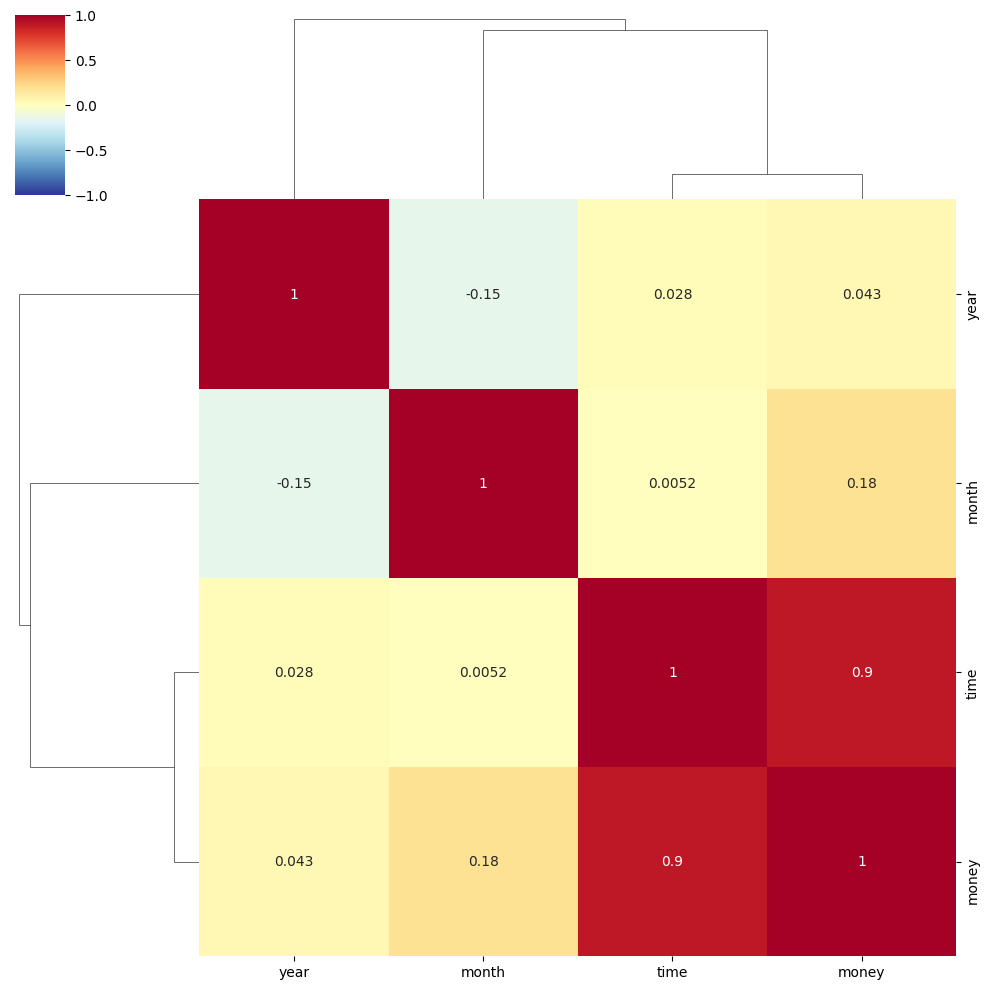

In [13]:
df = labor_df.corr()

sns.clustermap(df,
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [14]:
labor_df=pd.get_dummies(labor_df)

In [15]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.5 MB/s eta 0:00:00


In [16]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [17]:
from catboost import CatBoostRegressor

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [19]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

In [20]:
y_target = labor_df['money']
X_features = labor_df.drop(['money'],axis=1,inplace=False)

In [21]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# 책에서는 mean_absolute_error()를 MSE로 잘못 기재함.
# MAE, RMSE, RMSLE 를 모두 계산
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [22]:
labor_df.head()

,time,money,year,month,factory_1,factory_2,factory_4,factory_5,factory_6,factory_7,factory_8
1,1652670,667616320,2019,1,1,0,0,0,0,0,0
2,712980,296922280,2019,1,0,1,0,0,0,0,0
3,511020,197626310,2019,1,0,0,1,0,0,0,0
4,4380,17292550,2019,1,0,0,0,1,0,0,0
5,1145940,465917430,2019,1,0,0,0,0,1,0,0


In [23]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할.
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=False)

### LinearRegression ###
RMSLE: 0.345, RMSE: 124530503.263, MAE: 71828903.732
### Ridge ###
RMSLE: 0.339, RMSE: 124765575.251, MAE: 70684536.333
### Lasso ###
RMSLE: 0.345, RMSE: 124530503.262, MAE: 71828903.692


In [24]:
# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
cat_reg = CatBoostRegressor()

for model in [rf_reg, cat_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=False)

### RandomForestRegressor ###
RMSLE: 0.132, RMSE: 53530179.895, MAE: 34216696.891
Learning rate set to 0.033272
0:	learn: 263015793.5643690	total: 46.8ms	remaining: 46.8s
1:	learn: 257483570.7021832	total: 47.4ms	remaining: 23.7s
2:	learn: 251881129.9392937	total: 48ms	remaining: 16s
3:	learn: 246362657.2847598	total: 48.5ms	remaining: 12.1s
4:	learn: 240746054.3102688	total: 49ms	remaining: 9.76s
5:	learn: 234873591.7143560	total: 49.8ms	remaining: 8.26s
6:	learn: 229103754.7947493	total: 50.7ms	remaining: 7.19s
7:	learn: 224045243.7816188	total: 51.5ms	remaining: 6.38s
8:	learn: 218957844.6719571	total: 52.1ms	remaining: 5.73s
9:	learn: 214081139.5367443	total: 52.8ms	remaining: 5.23s
10:	learn: 209636414.9345247	total: 53.2ms	remaining: 4.79s
11:	learn: 205699617.2262779	total: 53.6ms	remaining: 4.41s
12:	learn: 201699822.4433120	total: 54.2ms	remaining: 4.12s
13:	learn: 197645912.8977145	total: 54.8ms	remaining: 3.86s
14:	learn: 192992981.1541184	total: 55.5ms	remaining: 3.64s
15:	

In [25]:
worksheet = gc.open('test_labor').sheet1
rows = worksheet.get_all_values()

labor_test_df = pd.DataFrame.from_records(rows)

In [26]:
#첫 번째 행을 칼럼 인덱스로 지정
labor_test_df = labor_test_df.rename(columns=labor_test_df.iloc[0])
labor_test_df = labor_test_df.drop(labor_test_df.index[0])

In [27]:
# 문자열을 정수형 타입으로 변경 (factory는 str로)
labor_test_df['factory'] = labor_test_df['factory'].astype(str)
labor_test_df['time'] = labor_test_df['time'].astype(int)

# 문자열을 datetime 타입으로 변경.
labor_test_df['date'] = labor_test_df.date.apply(pd.to_datetime)
labor_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 1 to 7
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7 non-null      datetime64[ns]
 1   factory  7 non-null      object        
 2   time     7 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 300.0+ bytes


In [28]:
labor_test_df['year'] = labor_test_df.date.apply(lambda x : x.year)
labor_test_df['month'] = labor_test_df.date.apply(lambda x : x.month)

In [29]:
labor_test_df = labor_test_df.drop(['date'], axis=1)

In [30]:
labor_test_df['factory'] = labor_test_df['factory'].astype(str)

In [31]:
labor_test_df=pd.get_dummies(labor_test_df)

In [32]:
cat_reg.fit(X_features, y_target)

Learning rate set to 0.035211
0:	learn: 267423702.8856100	total: 811us	remaining: 811ms
1:	learn: 260646961.9589561	total: 1.49ms	remaining: 742ms
2:	learn: 254449050.7028407	total: 2.18ms	remaining: 723ms
3:	learn: 248253842.6766978	total: 2.86ms	remaining: 713ms
4:	learn: 242045438.5735383	total: 3.55ms	remaining: 706ms
5:	learn: 236161307.1964643	total: 3.97ms	remaining: 658ms
6:	learn: 230017159.3631091	total: 4.63ms	remaining: 656ms
7:	learn: 224078182.4363535	total: 5.5ms	remaining: 681ms
8:	learn: 218424925.6111844	total: 6.01ms	remaining: 662ms
9:	learn: 212633904.9164959	total: 6.67ms	remaining: 660ms
10:	learn: 208259525.0283103	total: 7.87ms	remaining: 708ms
11:	learn: 204069494.4348724	total: 8.56ms	remaining: 705ms
12:	learn: 199383281.3455540	total: 9.51ms	remaining: 722ms
13:	learn: 194899212.4412312	total: 10.3ms	remaining: 729ms
14:	learn: 189980035.2618008	total: 11.3ms	remaining: 741ms
15:	learn: 185428218.8870604	total: 12.2ms	remaining: 750ms
16:	learn: 180687453.3

In [33]:
labor_test_pred = cat_reg.predict(labor_test_df)

In [34]:
labor_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 1 to 7
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   time       7 non-null      int64
 1   year       7 non-null      int64
 2   month      7 non-null      int64
 3   factory_1  7 non-null      uint8
 4   factory_2  7 non-null      uint8
 5   factory_4  7 non-null      uint8
 6   factory_5  7 non-null      uint8
 7   factory_6  7 non-null      uint8
 8   factory_7  7 non-null      uint8
 9   factory_8  7 non-null      uint8
dtypes: int64(3), uint8(7)
memory usage: 349.0 bytes


In [35]:
labor_test_pred

array([7.23726363e+08, 3.32041935e+08, 3.12798964e+08, 3.01876998e+07,
       5.83777940e+08, 6.14547867e+08, 1.13596989e+08])

In [36]:
result = pd.DataFrame(labor_test_pred)

In [37]:
pd.set_option('display.float_format', '{:,.0f}'.format)

In [38]:
result.head(7)

,0
0,"723,726,363"
1,"332,041,935"
2,"312,798,964"
3,"30,187,700"
4,"583,777,940"
5,"614,547,867"
6,"113,596,989"
